In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

path = "/content/drive/MyDrive/ml_odev/spotify_dataset.csv"
df_spotify = pd.read_csv(path)

df_spotify.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
import numpy as np

df_num = df_spotify.select_dtypes(include=[np.number]).copy()

df_num.head(), df_num.shape


(   Unnamed: 0  popularity  duration_ms  danceability  energy  key  loudness  \
 0           0          73       230666         0.676  0.4610    1    -6.746   
 1           1          55       149610         0.420  0.1660    1   -17.235   
 2           2          57       210826         0.438  0.3590    0    -9.734   
 3           3          71       201933         0.266  0.0596    0   -18.515   
 4           4          82       198853         0.618  0.4430    2    -9.681   
 
    mode  speechiness  acousticness  instrumentalness  liveness  valence  \
 0     0       0.1430        0.0322          0.000001    0.3580    0.715   
 1     1       0.0763        0.9240          0.000006    0.1010    0.267   
 2     1       0.0557        0.2100          0.000000    0.1170    0.120   
 3     1       0.0363        0.9050          0.000071    0.1320    0.143   
 4     1       0.0526        0.4690          0.000000    0.0829    0.167   
 
      tempo  time_signature  
 0   87.917               4  


In [ ]:
df_sample = df_num.sample(n=10000, random_state=42)
df_sample.shape


(10000, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample)

X_scaled[:5]


array([[ 1.74853954,  0.76771971,  2.07104097, -1.11049303, -0.18038412,
         0.47318148,  0.24638388,  0.75864847, -0.50838326, -0.92853368,
        -0.50208207, -0.20871651, -1.63500294,  0.84761619,  0.21623608],
       [-0.40853745, -0.98444957, -1.29745743, -2.24445085,  1.39668593,
         0.47318148,  0.93562131,  0.75864847,  0.302143  , -0.92823644,
         2.11283588,  1.04947607, -1.70096299, -0.01036536,  0.21623608],
       [ 0.09701933, -1.47865116, -0.13370433, -2.23299673,  0.62988997,
         1.03402239, -0.37977149, -1.31813355,  0.54271015,  0.87839062,
        -0.49584675, -0.1107425 , -1.47355421, -1.56255648, -2.15477353],
       [ 1.07971601, -1.47865116, -0.73861861,  0.68780372, -0.52425654,
         0.19276102,  0.52751487,  0.75864847, -0.53151471,  0.2630929 ,
        -0.50143895, -0.54389077,  0.4795536 , -0.41728368, -2.15477353],
       [ 0.14879506,  1.08221163,  0.08723805, -0.04525992,  1.17534277,
         1.03402239,  0.99484949, -1.31813355, 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

k_values = range(2, 11)
sil_scores = []
db_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)

    sil_scores.append(sil)
    db_scores.append(db)

sil_scores, db_scores


([np.float64(0.18331158488965726),
  np.float64(0.09350562745688906),
  np.float64(0.09448078868662832),
  np.float64(0.09902398044083639),
  np.float64(0.1058753462613066),
  np.float64(0.09456480345241731),
  np.float64(0.09992244078922562),
  np.float64(0.1061654244366267),
  np.float64(0.09429852219676614)],
 [np.float64(2.1702252727180382),
  np.float64(2.646239860680758),
  np.float64(2.4041925284844545),
  np.float64(2.1969924263022373),
  np.float64(2.119292303862237),
  np.float64(2.1112738202948163),
  np.float64(2.0306535679820072),
  np.float64(1.9011317632138152),
  np.float64(1.913567540142423)])

In [ ]:
import matplotlib.pyplot as plt


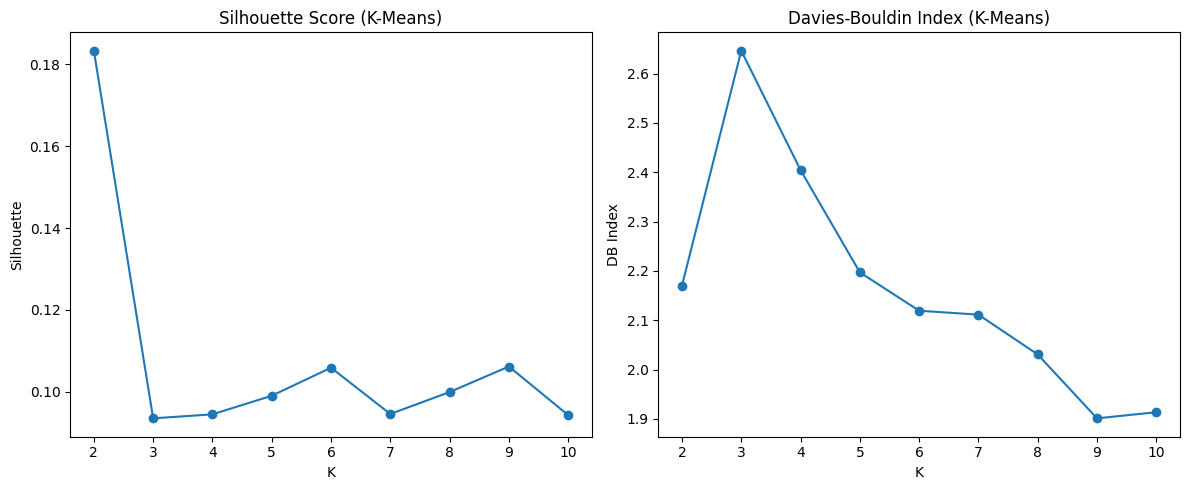

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(k_values, sil_scores, marker="o")
plt.title("Silhouette Score (K-Means)")
plt.xlabel("K")
plt.ylabel("Silhouette")

plt.subplot(1,2,2)
plt.plot(k_values, db_scores, marker="o")
plt.title("Davies-Bouldin Index (K-Means)")
plt.xlabel("K")
plt.ylabel("DB Index")

plt.tight_layout()
plt.show()


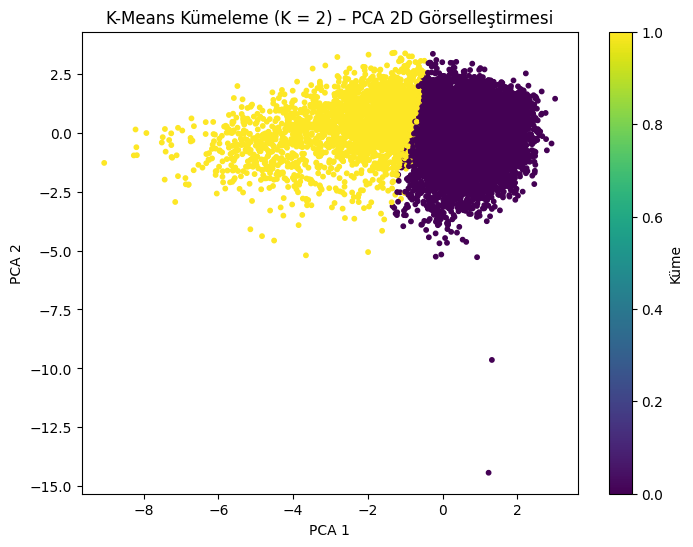

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ---- KMeans eğitimi ----
kmeans = KMeans(n_clusters=2, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

# ---- PCA ile 2D'ye indir ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ---- Görselleştirme ----
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap="viridis", s=10)
plt.title("K-Means Kümeleme (K = 2) – PCA 2D Görselleştirmesi")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Küme")
plt.show()


In [ ]:
numeric_cols = ['popularity','duration_ms','danceability','energy','key','loudness',
                'mode','speechiness','acousticness','instrumentalness','liveness',
                'valence','tempo','time_signature']

df_numeric = df_spotify[numeric_cols]
df_numeric.head()


,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

df_sample = df_numeric.sample(10000, random_state=42)
scaler = StandardScaler()
X_scaled_10k = scaler.fit_transform(df_sample)

X_scaled_10k[:5]


array([[ 0.76771971,  2.07104097, -1.11049303, -0.18038412,  0.47318148,
         0.24638388,  0.75864847, -0.50838326, -0.92853368, -0.50208207,
        -0.20871651, -1.63500294,  0.84761619,  0.21623608],
       [-0.98444957, -1.29745743, -2.24445085,  1.39668593,  0.47318148,
         0.93562131,  0.75864847,  0.302143  , -0.92823644,  2.11283588,
         1.04947607, -1.70096299, -0.01036536,  0.21623608],
       [-1.47865116, -0.13370433, -2.23299673,  0.62988997,  1.03402239,
        -0.37977149, -1.31813355,  0.54271015,  0.87839062, -0.49584675,
        -0.1107425 , -1.47355421, -1.56255648, -2.15477353],
       [-1.47865116, -0.73861861,  0.68780372, -0.52425654,  0.19276102,
         0.52751487,  0.75864847, -0.53151471,  0.2630929 , -0.50143895,
        -0.54389077,  0.4795536 , -0.41728368, -2.15477353],
       [ 1.08221163,  0.08723805, -0.04525992,  1.17534277,  1.03402239,
         0.99484949, -1.31813355, -0.34461254,  0.49494422, -0.50208207,
         0.25537091,  1.30

In [ ]:
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

k_values = range(2, 11)
birch_silhouette = []
birch_db = []

for k in k_values:
    birch_model = Birch(n_clusters=k)
    birch_labels = birch_model.fit_predict(X_scaled_10k)

    sil = silhouette_score(X_scaled_10k, birch_labels)
    db = davies_bouldin_score(X_scaled_10k, birch_labels)

    birch_silhouette.append(sil)
    birch_db.append(db)

birch_silhouette, birch_db


([np.float64(0.14827900819967998),
  np.float64(0.15711826130699316),
  np.float64(0.12575443363733124),
  np.float64(0.12164581000160743),
  np.float64(0.10154295864389444),
  np.float64(0.10547076030458793),
  np.float64(0.08518040268818998),
  np.float64(0.07840872649380581),
  np.float64(0.08270307390096425)],
 [np.float64(2.3887066591706345),
  np.float64(1.8666377114325643),
  np.float64(1.9921476782119947),
  np.float64(2.044163008326404),
  np.float64(1.9540295247027168),
  np.float64(1.9169102554638933),
  np.float64(2.0448622580382434),
  np.float64(2.074725242391887),
  np.float64(2.024345964754744)])

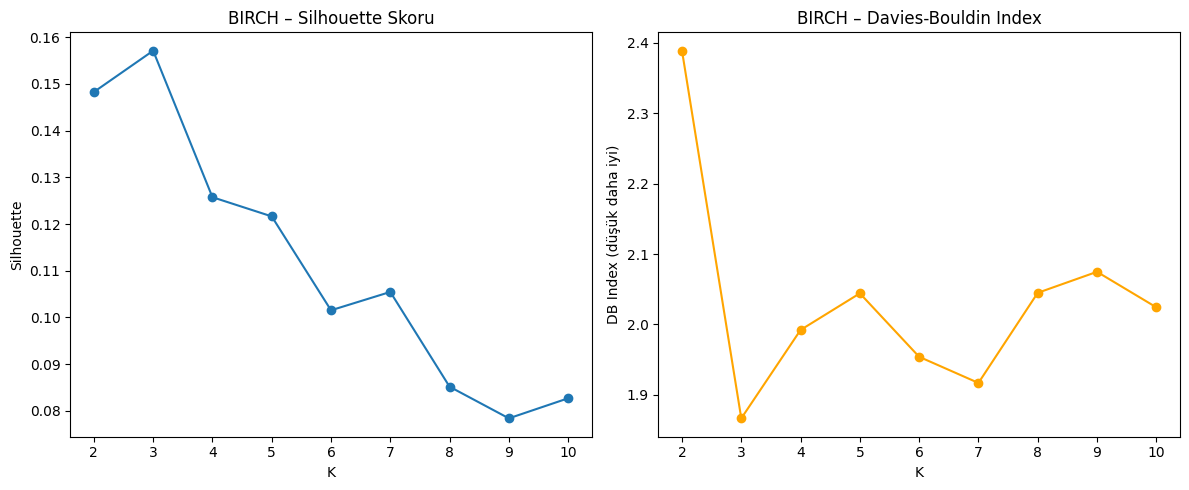

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Silhouette grafiği
plt.subplot(1,2,1)
plt.plot(list(k_values), birch_silhouette, marker="o")
plt.title("BIRCH – Silhouette Skoru")
plt.xlabel("K")
plt.ylabel("Silhouette")

# DB Index grafiği
plt.subplot(1,2,2)
plt.plot(list(k_values), birch_db, marker="o", color="orange")
plt.title("BIRCH – Davies-Bouldin Index")
plt.xlabel("K")
plt.ylabel("DB Index (düşük daha iyi)")

plt.tight_layout()
plt.show()

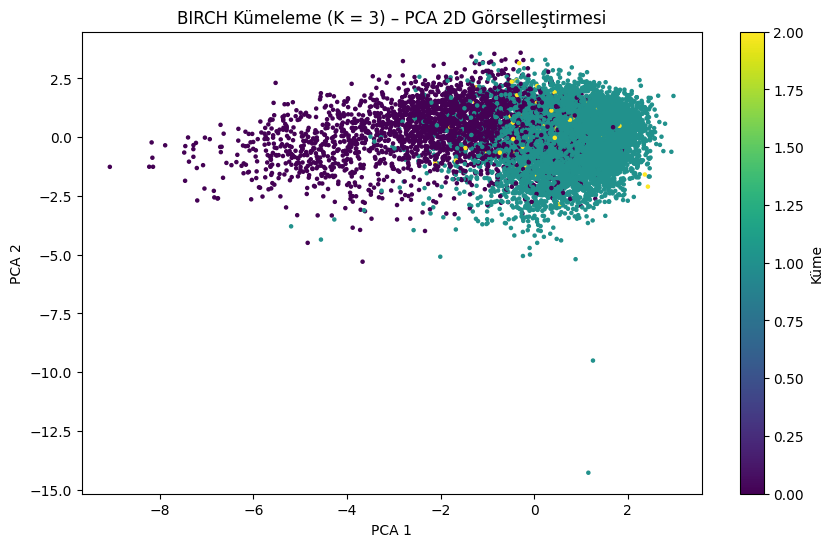

In [ ]:
# BIRCH için en iyi küme sayısı K=3
best_k = 3

birch_model = Birch(n_clusters=best_k)
birch_labels = birch_model.fit_predict(X_scaled_10k)

# PCA ile 2D görselleştirme
pca = PCA(n_components=2)
X_pca_birch = pca.fit_transform(X_scaled_10k)

plt.figure(figsize=(10,6))
plt.scatter(X_pca_birch[:,0], X_pca_birch[:,1], c=birch_labels, s=5, cmap="viridis")
plt.title("BIRCH Kümeleme (K = 3) – PCA 2D Görselleştirmesi")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Küme")
plt.show()


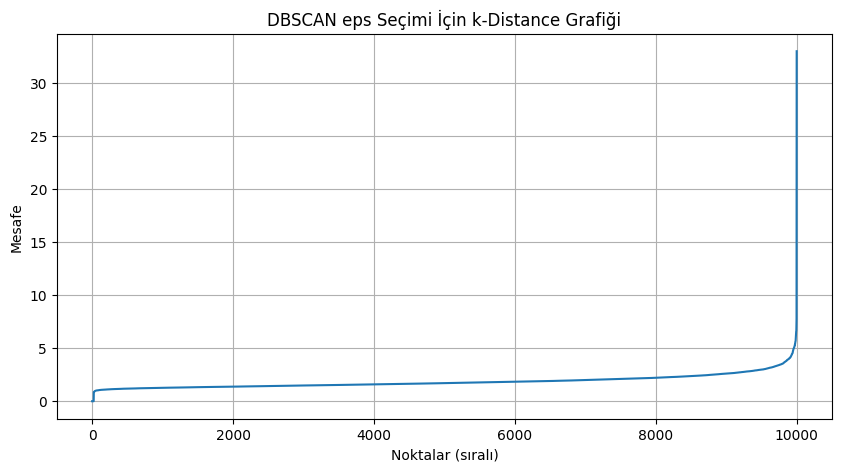

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

X = X_scaled_10k

neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances[:, -1])

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title("DBSCAN eps Seçimi İçin k-Distance Grafiği")
plt.ylabel("Mesafe")
plt.xlabel("Noktalar (sıralı)")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=10)
db_labels = dbscan.fit_predict(X_scaled_10k)

unique, counts = np.unique(db_labels, return_counts=True)
list(zip(unique, counts))


[(np.int64(-1), np.int64(9977)),
 (np.int64(0), np.int64(12)),
 (np.int64(1), np.int64(11))]

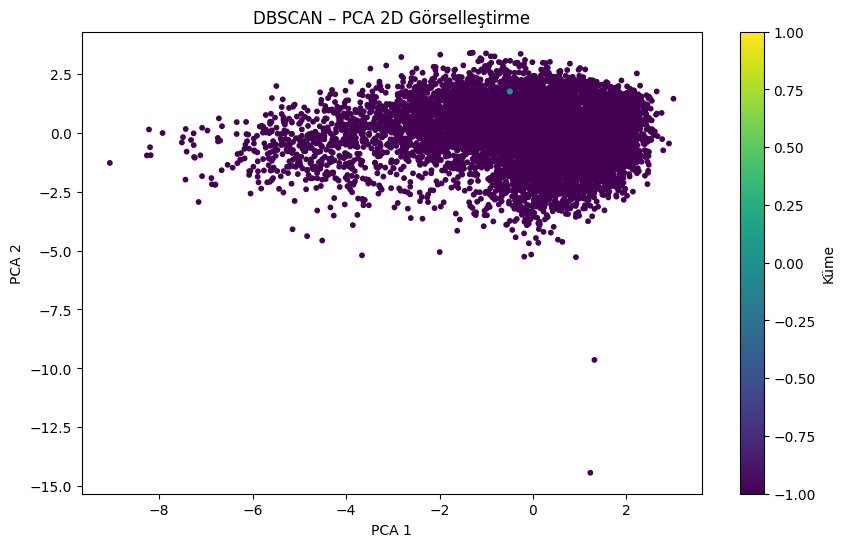

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=db_labels, cmap="viridis", s=10)
plt.title("DBSCAN – PCA 2D Görselleştirme")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Küme")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

mask = db_labels != -1
if len(np.unique(db_labels[mask])) > 1:
    sil_dbscan = silhouette_score(X_scaled_10k[mask], db_labels[mask])
    print("Silhouette (DBSCAN):", sil_dbscan)
else:
    print("DBSCAN yeterli küme bulamadı.")


Silhouette (DBSCAN): 0.9999999820814911


In [ ]:
import pandas as pd
import numpy as np

k_values = list(range(2, 11))

clustering_results = {
    "Model": ["K-Means", "BIRCH", "DBSCAN"],

    "Küme sayısı": [
        2,
        3,
        len(np.unique(db_labels[db_labels != -1]))
    ],

    "Silhouette Score": [
        sil_scores[k_values.index(2)],
        birch_silhouette[k_values.index(3)],
        sil_dbscan
    ],

    "Davies-Bouldin Index": [
        db_scores[k_values.index(2)],
        birch_db[k_values.index(3)],
        "DBSCAN için DB Index hesaplanmadı"
    ],

    "Gürültü oranı (%)": [
        0,
        0,
        (db_labels == -1).sum() / len(db_labels) * 100
    ]
}

df_cluster = pd.DataFrame(clustering_results)
df_cluster


,Model,Küme sayısı,Silhouette Score,Davies-Bouldin Index,Gürültü oranı (%)
0,K-Means,2,0.183312,2.170225,0.00
1,BIRCH,3,0.157118,1.866638,0.00
2,DBSCAN,2,1.000000,DBSCAN için DB Index hesaplanmadı,99.77


/tmp/ipython-input-749251994.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dbi = df_cluster["Davies-Bouldin Index"].replace("DBSCAN için DB Index hesaplanmadı", np.nan)
/tmp/ipython-input-749251994.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=sil, palette="viridis")
/tmp/ipython-input-749251994.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=dbi, palette="coolwarm")
/tmp/ipython-input-749251994.py:29: FutureWarning: 

P

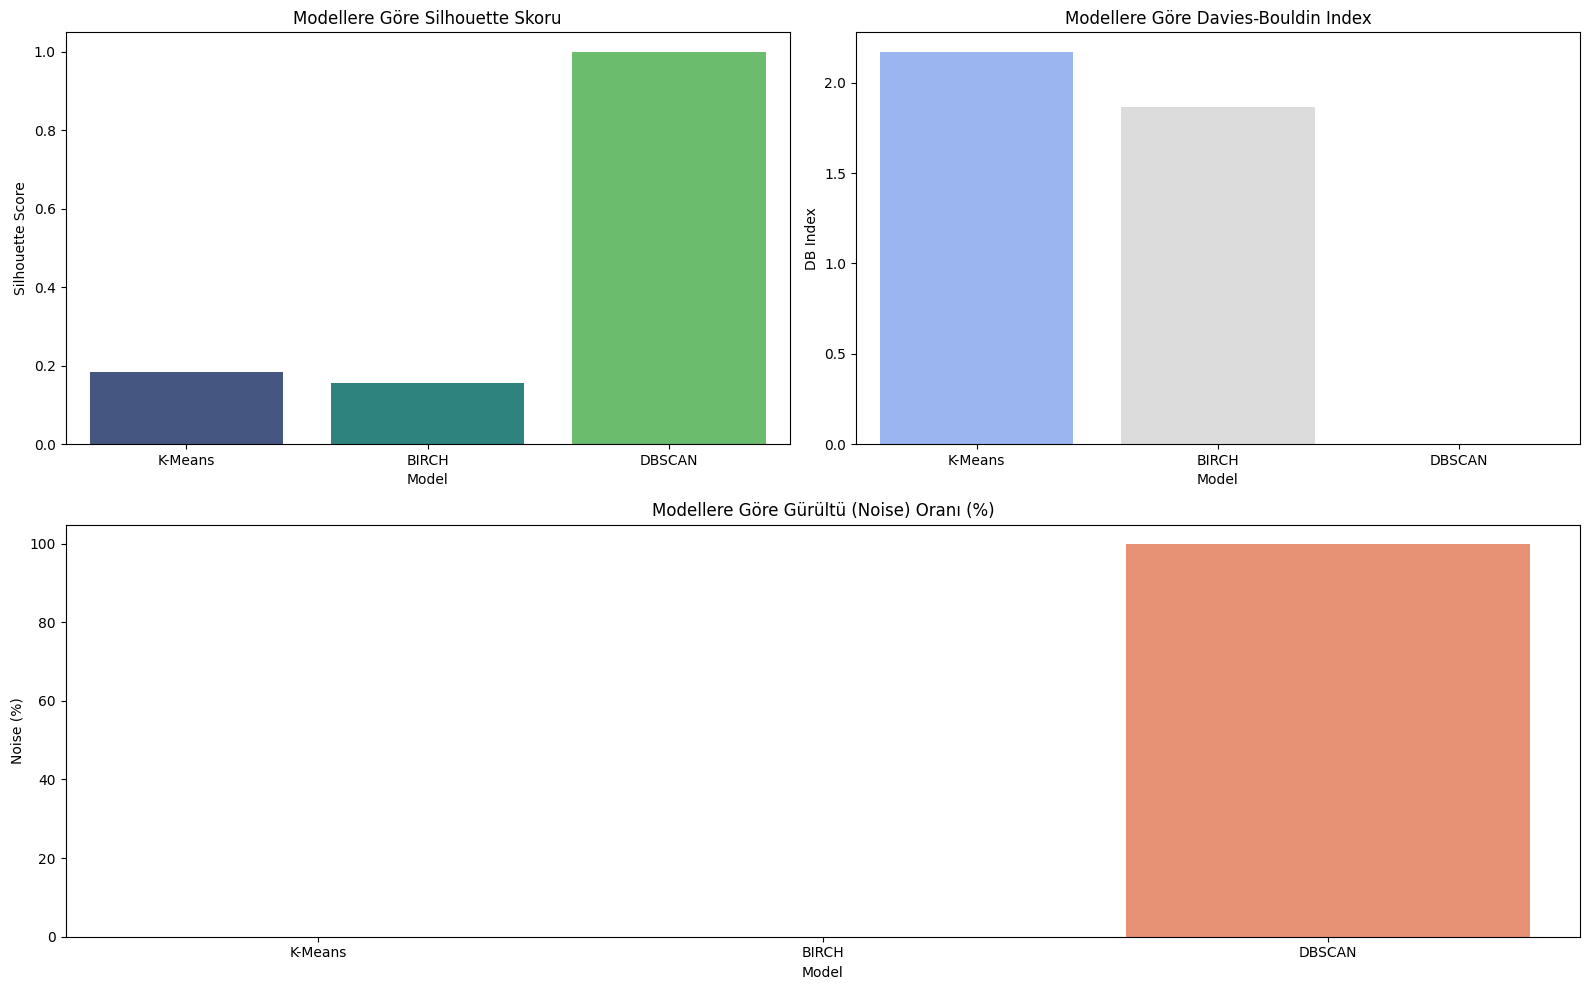

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


models = df_cluster["Model"]
sil = df_cluster["Silhouette Score"]
dbi = df_cluster["Davies-Bouldin Index"].replace("DBSCAN için DB Index hesaplanmadı", np.nan)
noise = df_cluster["Gürültü oranı (%)"]

plt.figure(figsize=(16,10))

# --- 1) Silhouette Skoru ---
plt.subplot(2,2,1)
sns.barplot(x=models, y=sil, palette="viridis")
plt.title("Modellere Göre Silhouette Skoru")
plt.ylabel("Silhouette Score")
plt.xlabel("Model")

# --- 2) Davies-Bouldin Index ---
plt.subplot(2,2,2)
sns.barplot(x=models, y=dbi, palette="coolwarm")
plt.title("Modellere Göre Davies-Bouldin Index")
plt.ylabel("DB Index")
plt.xlabel("Model")

# --- 3) Gürültü Oranı ---
plt.subplot(2,1,2)
sns.barplot(x=models, y=noise, palette="magma")
plt.title("Modellere Göre Gürültü (Noise) Oranı (%)")
plt.ylabel("Noise (%)")
plt.xlabel("Model")

plt.tight_layout()
plt.show()


/tmp/ipython-input-331239472.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dbi_raw = df_cluster["Davies-Bouldin Index"].replace(


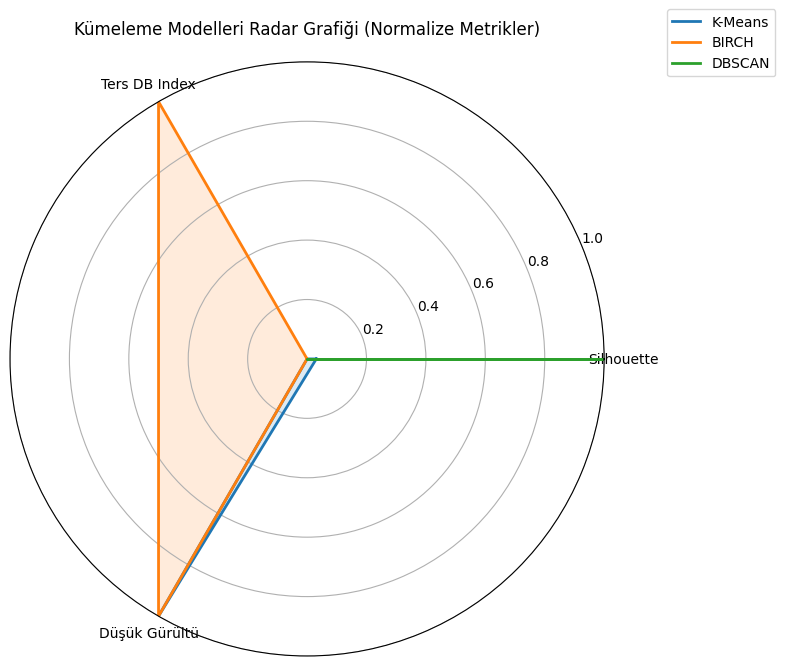

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

models = df_cluster["Model"].values

sil = df_cluster["Silhouette Score"].astype(float).values
dbi_raw = df_cluster["Davies-Bouldin Index"].replace(
    "DBSCAN için DB Index hesaplanmadı", np.nan
).astype(float).values
noise = df_cluster["Gürültü oranı (%)"].astype(float).values


# 1) Silhouette
sil_norm = (sil - np.nanmin(sil)) / (np.nanmax(sil) - np.nanmin(sil))

# 2) DB Index
dbi_norm = (np.nanmax(dbi_raw) - dbi_raw) / (np.nanmax(dbi_raw) - np.nanmin(dbi_raw))
dbi_norm = np.nan_to_num(dbi_norm, nan=0.0)

# 3) Gürültü
noise_norm = (np.nanmax(noise) - noise) / (np.nanmax(noise) - np.nanmin(noise))


metrics = np.vstack([sil_norm, dbi_norm, noise_norm]).T
labels = ["Silhouette", "Ters DB Index", "Düşük Gürültü"]

N = len(labels)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False)
angles = np.concatenate([angles, [angles[0]]])

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for i, model in enumerate(models):
    values = np.concatenate([metrics[i], [metrics[i][0]]])
    ax.plot(angles, values, linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.15)

ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels)
ax.set_title("Kümeleme Modelleri Radar Grafiği (Normalize Metrikler)", pad=20)
ax.set_rlim(0, 1)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()

plt.savefig("clustering_radar_chart.png", dpi=300, bbox_inches="tight")

plt.show()


In [ ]:
X_scaled_10k.shape
kmeans_labels[:5]
birch_labels[:5]
db_labels[:5]
X_pca[:5]


array([[-0.03727209, -1.86367761],
       [ 0.08760386, -3.06925427],
       [-1.70498455, -1.52334689],
       [-0.39896596,  1.32357077],
       [ 1.35586417,  0.64334248]])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled_10k)


In [ ]:
from sklearn.cluster import Birch, DBSCAN
from sklearn.decomposition import PCA

birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X_scaled_10k)

dbscan = DBSCAN(eps=1.2, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled_10k)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_10k)


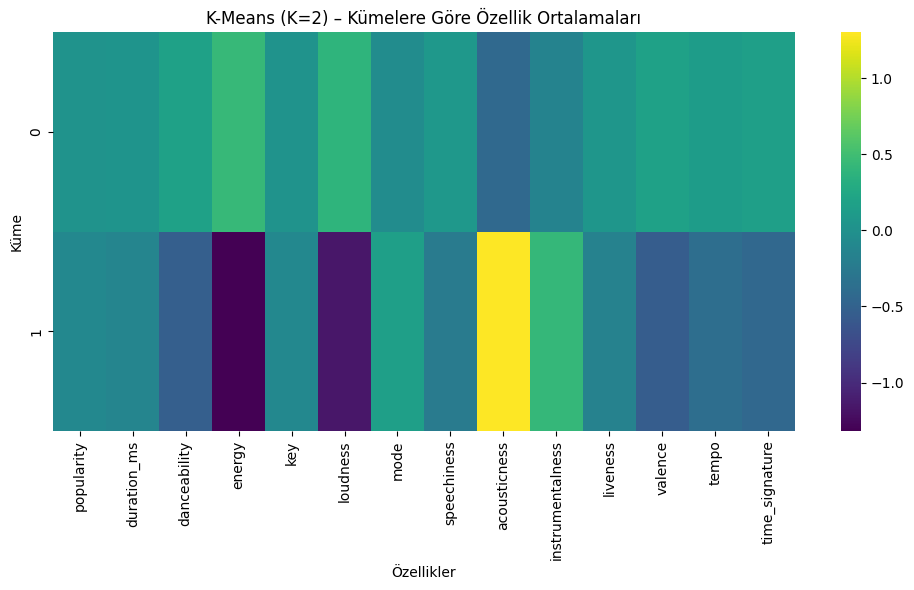

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ["popularity", "duration_ms", "danceability", "energy",
                "key", "loudness", "mode", "speechiness", "acousticness",
                "instrumentalness", "liveness", "valence", "tempo", "time_signature"]

df_scaled_kmeans = pd.DataFrame(X_scaled_10k, columns=numeric_cols)

df_scaled_kmeans["cluster"] = kmeans_labels

cluster_means_kmeans = df_scaled_kmeans.groupby("cluster").mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means_kmeans, annot=False, cmap="viridis")
plt.title("K-Means (K=2) – Kümelere Göre Özellik Ortalamaları")
plt.xlabel("Özellikler")
plt.ylabel("Küme")
plt.tight_layout()
plt.show()


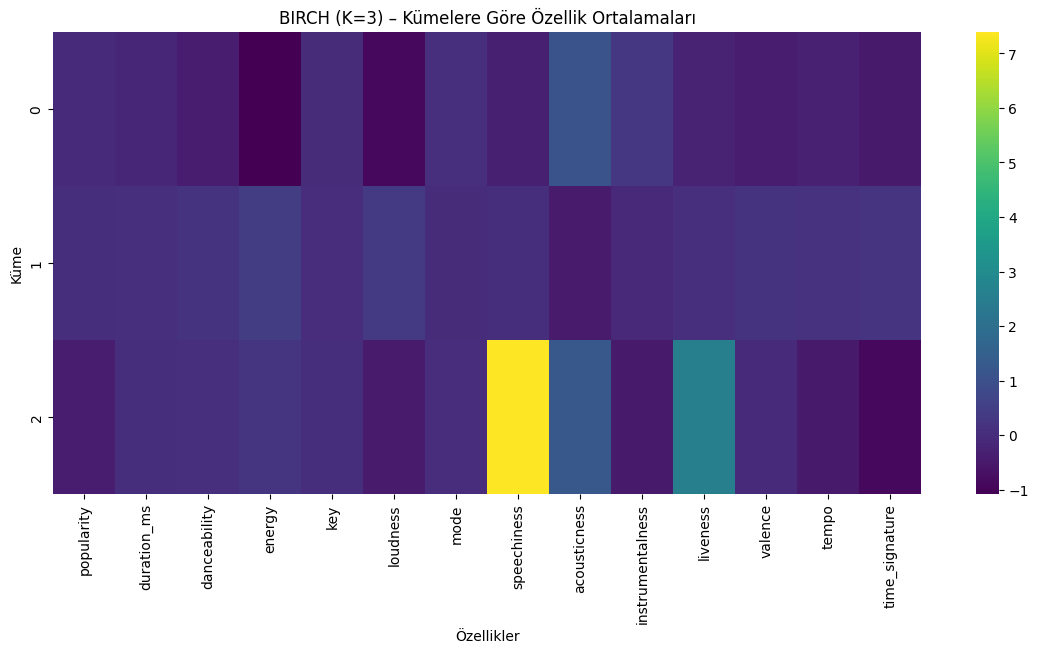

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_birch = pd.DataFrame(X_scaled_10k, columns=numeric_cols)
df_birch["cluster"] = birch_labels

birch_means = df_birch.groupby("cluster").mean()

plt.figure(figsize=(14,6))
sns.heatmap(birch_means, cmap="viridis", annot=False)
plt.title("BIRCH (K=3) – Kümelere Göre Özellik Ortalamaları")
plt.xlabel("Özellikler")
plt.ylabel("Küme")
plt.show()


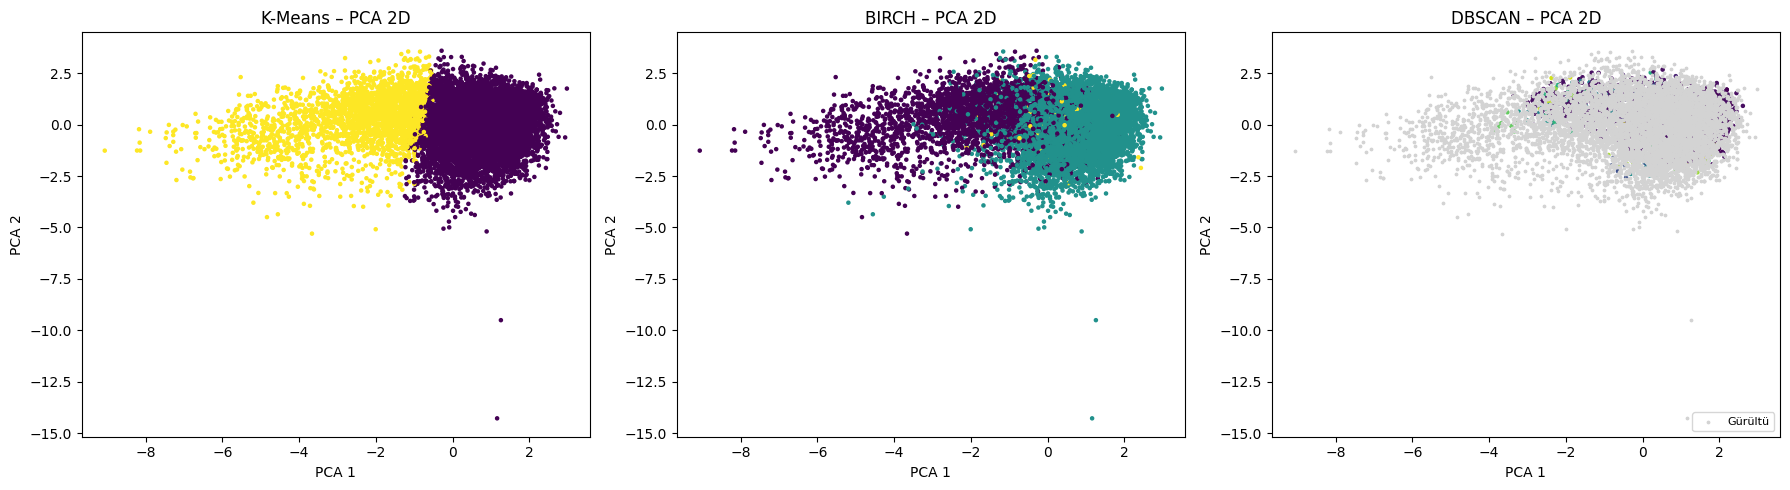

In [ ]:
import matplotlib.pyplot as plt

models = [
    ("K-Means", kmeans_labels),
    ("BIRCH", birch_labels),
    ("DBSCAN", db_labels)
]

plt.figure(figsize=(18, 5))

for i, (name, labels) in enumerate(models, 1):
    plt.subplot(1, 3, i)

    if name == "DBSCAN":
        mask_noise = (labels == -1)
        mask_core = (labels != -1)

        plt.scatter(X_pca[mask_core, 0], X_pca[mask_core, 1],
                    c=labels[mask_core], s=5, cmap="viridis")
        plt.scatter(X_pca[mask_noise, 0], X_pca[mask_noise, 1],
                    c="lightgrey", s=3, label="Gürültü")
        plt.legend(loc="lower right", fontsize=8)
    else:
        plt.scatter(X_pca[:, 0], X_pca[:, 1],
                    c=labels, s=5, cmap="viridis")

    plt.title(f"{name} – PCA 2D")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()


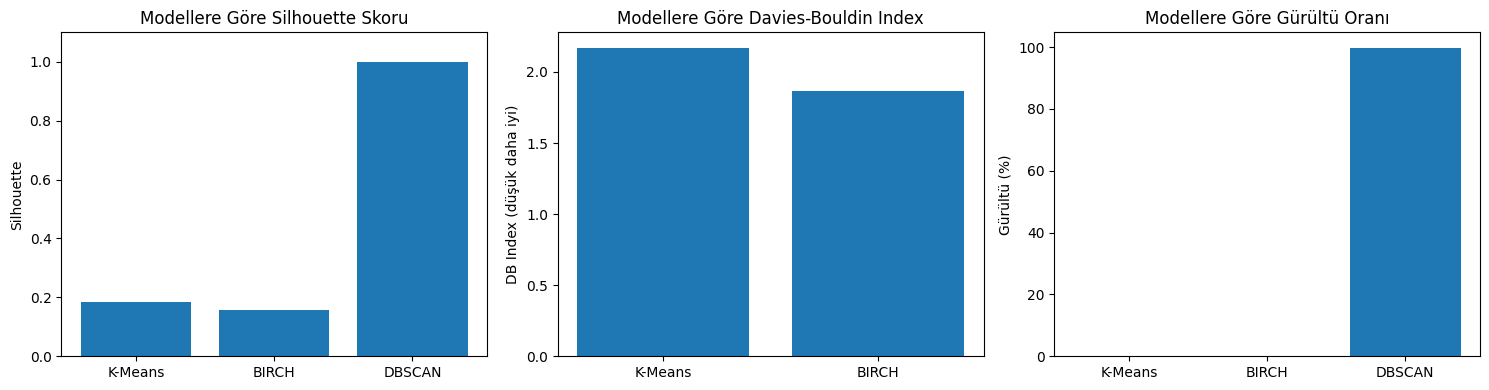

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_plot = df_cluster.copy()
df_plot["Davies-Bouldin Num"] = pd.to_numeric(
    df_plot["Davies-Bouldin Index"], errors="coerce"
)

plt.figure(figsize=(15, 4))

# 1) Silhouette
plt.subplot(1, 3, 1)
plt.bar(df_plot["Model"], df_plot["Silhouette Score"])
plt.title("Modellere Göre Silhouette Skoru")
plt.ylabel("Silhouette")
plt.ylim(0, 1.1)

# 2) Davies-Bouldin (DBSCAN hariç)
plt.subplot(1, 3, 2)
mask_db = ~df_plot["Davies-Bouldin Num"].isna()
plt.bar(df_plot["Model"][mask_db], df_plot["Davies-Bouldin Num"][mask_db])
plt.title("Modellere Göre Davies-Bouldin Index")
plt.ylabel("DB Index (düşük daha iyi)")

# 3) Gürültü oranı
plt.subplot(1, 3, 3)
plt.bar(df_plot["Model"], df_plot["Gürültü oranı (%)"])
plt.title("Modellere Göre Gürültü Oranı")
plt.ylabel("Gürültü (%)")

plt.tight_layout()
plt.show()
